In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('austin_weather.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
df_temp = df[['Date', 'TempAvgF']]

In [5]:
# convert column Date to datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

/var/folders/cm/tp384c9x4q78rhtw47g1d4800000gn/T/ipykernel_2095/1586846869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Date'] = pd.to_datetime(df_temp['Date'])


In [6]:
# convert format
df_temp['Date'] = df_temp['Date'].dt.strftime('%D')
df_temp.head()

/var/folders/cm/tp384c9x4q78rhtw47g1d4800000gn/T/ipykernel_2095/1064069751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Date'] = df_temp['Date'].dt.strftime('%D')


,Date,TempAvgF
0,12/21/13,60
1,12/22/13,48
2,12/23/13,45
3,12/24/13,46
4,12/25/13,50


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1319 non-null   object
 1   TempAvgF  1319 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


In [8]:
# reset the index to Date
df_temp.index = df_temp['Date']
del df_temp['Date']
df_temp.head()

,TempAvgF
Date,
12/21/13,60
12/22/13,48
12/23/13,45
12/24/13,46
12/25/13,50


Text(0, 0.5, 'AvgTempF')

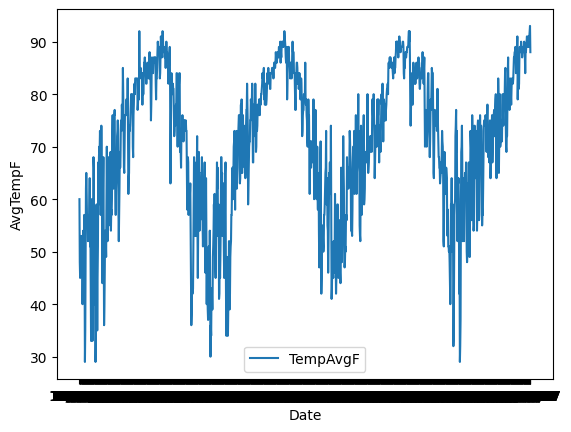

In [9]:
# generate a plot
sns.lineplot(df_temp)
plt.ylabel ('AvgTempF')

In [10]:
# import the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [11]:
# AIC is the autolag parameter
adft = adfuller (df_temp, autolag = 'AIC')

In [12]:
# store results in a data frame
output_df = pd.DataFrame({'Values': [adft[0], adft[1], adft[2], adft[3],
                                    adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
                         'Metric': ['Test Statistics', 'p-value', 'No. of lags used',
                                   'Number of observations used', 'critical value (1%)',
                                   'critical value (5%)', 'critical value (10%)']
                         
                         })
print (output_df)

        Values                       Metric
0    -2.498133              Test Statistics
1     0.115929                      p-value
2    13.000000             No. of lags used
3  1305.000000  Number of observations used
4    -3.435371          critical value (1%)
5    -2.863757          critical value (5%)
6    -2.567950         critical value (10%)


In [13]:
autocorr_lag1 = df_temp['TempAvgF'].autocorr (lag = 1)
print ('One Month Lag: ', autocorr_lag1)

One Month Lag:  0.9192098442002877


In [14]:
autocorr_lag3 = df['TempAvgF'].autocorr (lag = 3)
print ('Three Month Lag: ', autocorr_lag3)

Three Month Lag:  0.799160623219176


In [15]:
autocorr_lag6 = df['TempAvgF'].autocorr (lag = 6)
print ('Six Month Lag: ', autocorr_lag6)

Six Month Lag:  0.7800773253123889


In [16]:
autocorr_lag9 = df['TempAvgF'].autocorr (lag = 9)
print ('Nine Month Lag: ', autocorr_lag3)

Nine Month Lag:  0.799160623219176


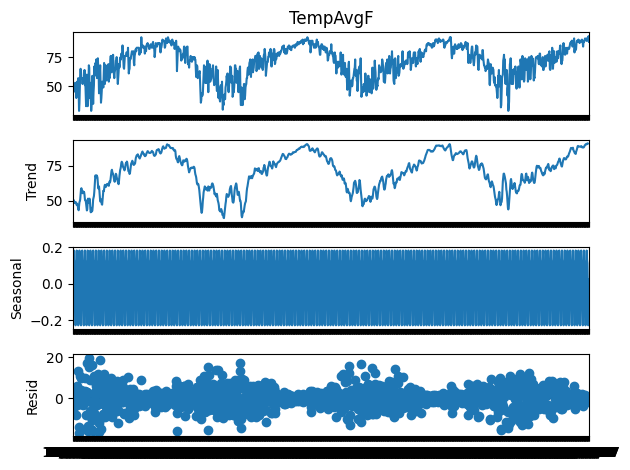

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

sd = seasonal_decompose (df_temp['TempAvgF'], model = 'additive', period = 7)
sd.plot()
plt.show()

In [18]:
df_temp.head()

,TempAvgF
Date,
12/21/13,60
12/22/13,48
12/23/13,45
12/24/13,46
12/25/13,50


In [19]:
# split data into training and testing set
df_temp['Day'] = df_temp.index
df_temp['Day'] = pd.to_datetime(df['Day'])
train = df_temp[df_temp['Day'] < pd.to_datetime ('5/31/17', format = '%m/%d/%y')]
test = df_temp[df_temp['Day'] >= pd.to_datetime ('5/31/17', format = '%m/%d/%y')]
del train['Day']
del test['Day']

/var/folders/cm/tp384c9x4q78rhtw47g1d4800000gn/T/ipykernel_2095/315851226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Day'] = df_temp.index


KeyError: 'Day'

In [ ]:
train.head()